In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:
wine = load_wine()
wine                #把資料叫進來

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [20]:
wine.feature_names   #特徵名稱(欄位名)，此筆資料集 中有13個欄位

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target_names   #最後結果target(目標) 一欄中各自不同的意義

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [13]:
#整理資料
feature = pd.DataFrame(wine['data'],columns=wine['feature_names'])
target = pd.DataFrame(wine['target'],columns=['class'])

df = pd.concat([feature,target],axis=1)
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [15]:
df.info()    #可以看資料型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [16]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## ✏️ 畫出 “Malic acid” 和 “Magnesium” 的散點圖

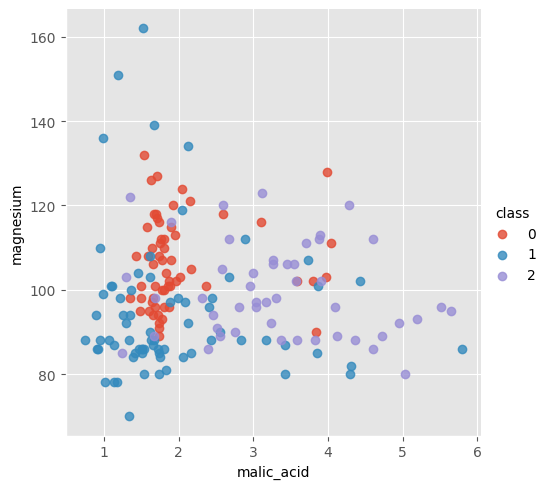

In [24]:
plt.style.use('ggplot')  #style.use是matplotlib中用於設置圖形樣式的方法
    #'ggplot' 是其中一種樣式名稱，它模仿了 R 語言中的 ggplot2 包的樣式。通過這個方法，
     # 我們可以將 Matplotlib 圖形的樣式設置為預定義的樣式名稱，從而使圖形更具可讀性和美觀性。
sns.lmplot(x = 'malic_acid',
           y = 'magnesium',
           data = df,
           fit_reg = False,    #是否繪製線性回歸的擬合直線
           hue = 'class')      #小圖提示


#sns.lmplot()，lmplot全名為是linear model plot
# 為Seaborn 庫中的一個函數，用於繪製線性回歸模型的圖形。該函數可以透過數據框中的變數
# 來擬合一個線性模型，並使用散點圖可視化數據的分布情況，同時還可以可視化線性回歸線的擬合結果。具體來說，
# sns.lmplot() 函數將使用一個二維坐標系來繪製數據點，並將線性回歸線擬合到這些數據點上。此外，還可以使用
# 參數來調整擬合線的外觀，例如更改線條顏色、線條粗細等。sns.lmplot() 函數通常用於探索兩個變數之間的關係，
# 並可以幫助我們識別變數之間的線性關係，以及可能存在的異常值或趨勢。


# 3. Training and Evaluating

In [34]:
X = df.iloc[:,:-1].values  #逗號左邊是列，選擇全部  逗號右邊為行，選擇一到倒數第二行
y = df.iloc[:,-1].values   #.values屬性，返回一個numpy的二維數組，不包含列索引和行標籤
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## ✏️ 比較 k = 1,3,5,...,49 的結果，並找出其中最好的 k 值

### 1. 保留交叉驗證法(Holdout Cross Validation)

In [50]:
neighbors = [x for x in range(50) if x%2!=0 ]    #1,3,5,7,.......49
scores = []

#將training data再次拆分
X_train_train,X_train_val,y_train_train,y_train_val = train_test_split(X_train,y_train,test_size=0.1,random_state=1)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_train,y_train_train)
    predict = knn.predict(X_train_val)    #用X_train來產生預估的資料
    accuracy = accuracy_score(y_train_val,predict) #與實際資料進行比較
    scores.append(accuracy)

optimal_k = neighbors[scores.index(max(scores))]   #找出scores 串列中的最大值並回傳索引
                                        #在scores中位在第二筆的位置，但在neighbors中是3
                                        #因為她是用基數來數，1、3 第二筆位置在3
print('The optimal number of neighbors address is %d' % optimal_k)

The optimal number of neighbors address is 3


## ✏️ 畫出上述結果(k = 1, 3, 5, ..., 49) 的 CV score 折線圖

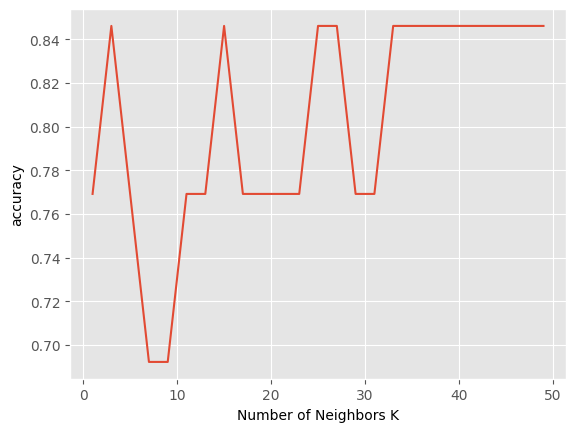

In [51]:
plt.plot(neighbors,scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('accuracy')
plt.show()

## ✏️ 建立最終模型，並評估最終模型的準確率  

In [55]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train,y_train)   #利用訓練集資料生成一個模型
predict = knn.predict(X_test)  #將X的測試資料餵給預測模型
accuracy_score(y_test,predict)   #將y的測試資料拿去跟預測模型做分數比較

0.7407407407407407

### 2. K-fold交叉驗證法(K-fold Cross-Validation)

In [62]:
neighbors = [x for x in range(50) if x%2 != 0]
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring='accuracy')
    cv_scores.append(scores.mean())   #每一列又會跑10次，同一筆資料但找出10個不同的訓練集和測試集位置去測試
                                      #利用mean()來取得一個平均值，並把資料數值從10筆數值縮成一筆
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print('The optimal number of neighbors is %d'%optimal_k)

The optimal number of neighbors is 3


## ✏️ 畫出上述結果(k = 1, 3, 5, ..., 49) 的 CV score 折線圖

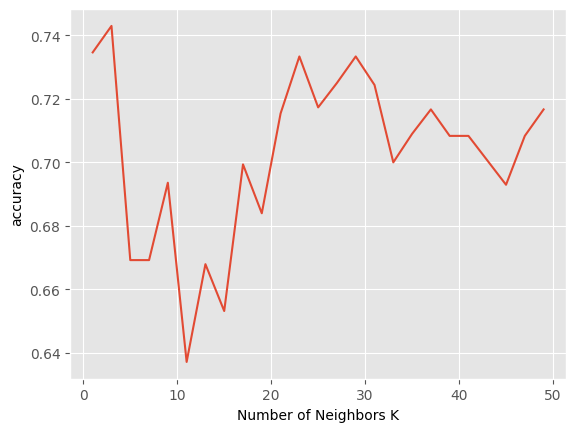

In [65]:
plt.plot(neighbors,cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('accuracy')
plt.show()

## ✏️ 建立最終模型，並評估最終模型的準確率  

In [66]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
accuracy_score(predict,y_test)

0.7407407407407407